In [1]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings

    warnings.filterwarnings("ignore")

    %matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\tando\Downloads\Compressed\household_power_consumption\household_power_consumption.txt")

In [3]:
df.to_csv("household_power.csv")

In [4]:
df1=pd.read_csv(r"C:\Users\tando\Downloads\household_power.csv")

In [5]:
df1

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...,...
2075254,2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [6]:
dfc=df1

In [7]:
dfc=dfc.drop(['Unnamed: 0'],axis=1)

In [8]:
dfc.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [9]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [10]:
dfc[dfc.duplicated()]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [11]:
dfc=dfc.sample(50000)

In [12]:
dfc.shape

(50000, 9)

In [13]:
dfc.isnull().sum()

Date                       0
Time                       0
Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1             0
Sub_metering_2             0
Sub_metering_3           629
dtype: int64

In [14]:
patch_index=dfc[dfc['Global_active_power']=="?"].index

In [15]:
# Dropping technique

In [16]:
dfc_drop=dfc

In [17]:
for i in patch_index:
    dfc_drop=dfc_drop.drop(i)

In [18]:
dfc_drop.shape

(49371, 9)

In [19]:
15000-14813

187

In [20]:
dfc_drop['Global_active_power']=pd.to_numeric(dfc_drop['Global_active_power'])

In [21]:
dfc_drop['Global_active_power']=pd.to_numeric(dfc_drop['Global_active_power'])
dfc_drop['Global_reactive_power']=pd.to_numeric(dfc_drop['Global_reactive_power'])
dfc_drop['Voltage']=pd.to_numeric(dfc_drop['Voltage'])
dfc_drop['Global_intensity']=pd.to_numeric(dfc_drop['Global_intensity'])
dfc_drop['Sub_metering_1']=pd.to_numeric(dfc_drop['Sub_metering_1'])
dfc_drop['Sub_metering_2']=pd.to_numeric(dfc_drop['Sub_metering_2'])
dfc_drop['Sub_metering_3']=pd.to_numeric(dfc_drop['Sub_metering_3'])

In [22]:
dfc_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49371 entries, 666813 to 1350489
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   49371 non-null  object 
 1   Time                   49371 non-null  object 
 2   Global_active_power    49371 non-null  float64
 3   Global_reactive_power  49371 non-null  float64
 4   Voltage                49371 non-null  float64
 5   Global_intensity       49371 non-null  float64
 6   Sub_metering_1         49371 non-null  float64
 7   Sub_metering_2         49371 non-null  float64
 8   Sub_metering_3         49371 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.8+ MB


<AxesSubplot:ylabel='Density'>

<Figure size 432x288 with 0 Axes>

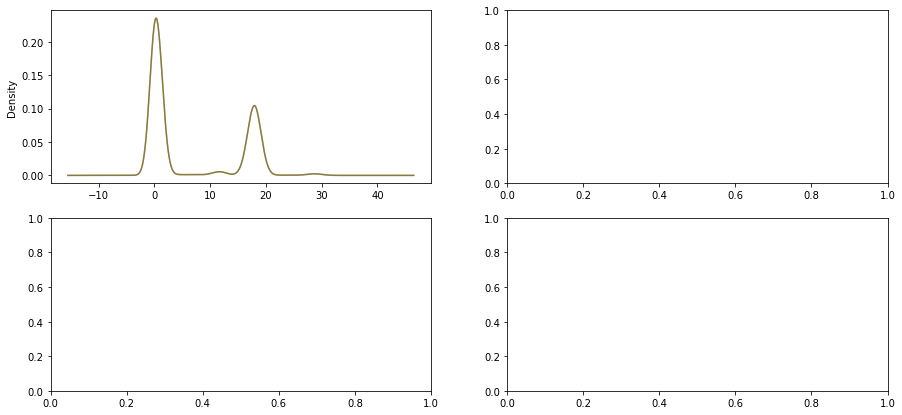

In [23]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

dfc_drop['Sub_metering_3'].plot.density(color='red',ax=axs[0, 0],alpha=0.5,label='Size')
dfc['Sub_metering_3'].plot.density(color='green',ax=axs[0, 0],alpha=0.5,label='Size')

<Figure size 432x288 with 0 Axes>

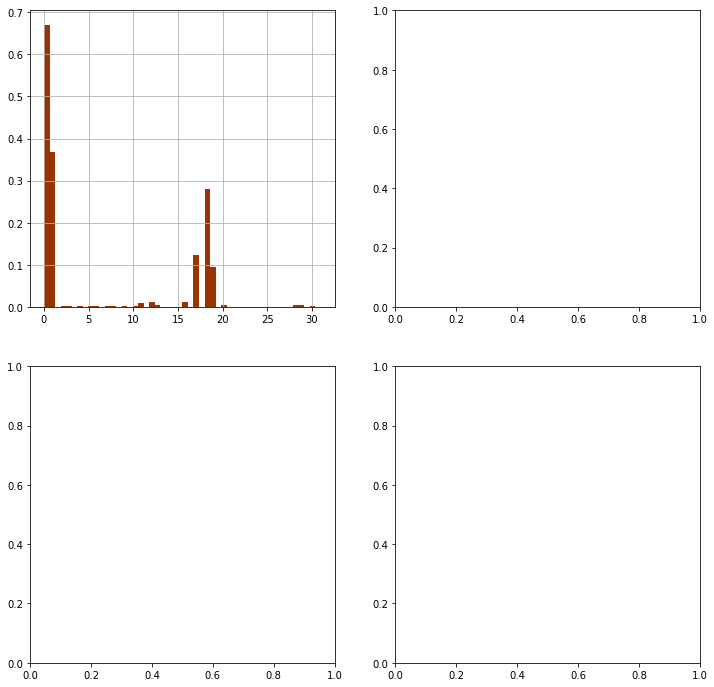

In [24]:
fig= plt.figure()

# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
dfc_drop['Sub_metering_3'].hist(bins=50,ax=axs[0, 0],density=True,figsize=(12,12),color='red')
dfc['Sub_metering_3'].hist(bins=50,ax=axs[0, 0],density=True,figsize=(12,12),color='green', alpha=0.4)
plt.show()

In [25]:
# Almost follows the same graph

In [26]:
df_copy_mean = dfc



In [27]:
dropped_dfc=dfc

In [28]:
for i in patch_index:
    dropped_dfc.drop(i)

In [29]:
dropped_dfc['Global_active_power']=pd.to_numeric(dfc_drop['Global_active_power'])
dropped_dfc['Global_reactive_power']=pd.to_numeric(dfc_drop['Global_reactive_power'])
dropped_dfc['Voltage']=pd.to_numeric(dfc_drop['Voltage'])
dropped_dfc['Global_intensity']=pd.to_numeric(dfc_drop['Global_intensity'])
dropped_dfc['Sub_metering_1']=pd.to_numeric(dfc_drop['Sub_metering_1'])
dropped_dfc['Sub_metering_2']=pd.to_numeric(dfc_drop['Sub_metering_2'])
dropped_dfc['Sub_metering_3']=pd.to_numeric(dfc_drop['Sub_metering_3'])

In [30]:
glob_act_mean=dropped_dfc['Global_active_power'].mean()

In [31]:
glob_act_mean

1.0921655222701705

In [32]:
glob_act_mean=dropped_dfc['Global_active_power'].mean()
glob_rct_mean=dropped_dfc['Global_reactive_power'].mean()
vol=dropped_dfc['Voltage'].mean()
glo_int=dropped_dfc['Global_intensity'].mean()
sub_1=dropped_dfc['Sub_metering_1'].mean()
sub_2=dropped_dfc['Sub_metering_2'].mean()
sub_3=dropped_dfc['Sub_metering_3'].mean()

In [33]:
for i in patch_index:
    df_copy_mean['Global_active_power'].loc[i]=glob_act_mean
    df_copy_mean['Global_reactive_power'].loc[i]=glob_rct_mean
    df_copy_mean['Voltage'].loc[i]=vol
    df_copy_mean['Global_intensity'].loc[i]=glo_int
    df_copy_mean['Sub_metering_1'].loc[i]=sub_1
    df_copy_mean['Sub_metering_2'].loc[i]=sub_2
    df_copy_mean['Sub_metering_3'].loc[i]=sub_3


In [34]:
print('Original Size Variance', df_copy_mean['Global_active_power'].var())
print('Original Size Variance', df_copy_mean['Global_reactive_power'].var())
print('Original Size Variance', df_copy_mean['Voltage'].var())
print('Original Size Variance', df_copy_mean['Global_intensity'].var())
print('Original Size Variance', df_copy_mean['Sub_metering_1'].var())
print('Original Size Variance', df_copy_mean['Sub_metering_2'].var())
print('Original Size Variance', df_copy_mean['Sub_metering_3'].var())

Original Size Variance 1.1038347008410168
Original Size Variance 0.012581639570921668
Original Size Variance 10.258183144043272
Original Size Variance 19.488600600168386
Original Size Variance 37.97293736563537
Original Size Variance 32.67297395286158
Original Size Variance 70.37307582879004


In [35]:
# median imputation

In [36]:
glob_act_med=dropped_dfc['Global_active_power'].median()
glob_rct_med=dropped_dfc['Global_reactive_power'].median()
vo_med=dropped_dfc['Voltage'].median()
glo_int_med=dropped_dfc['Global_intensity'].median()
sub_1_med=dropped_dfc['Sub_metering_1'].median()
sub_2_med=dropped_dfc['Sub_metering_2'].median()
sub_3_med=dropped_dfc['Sub_metering_3'].median()

In [37]:
df_copy_median = dfc

In [38]:
for i in patch_index:
    df_copy_median['Global_active_power'].loc[i]=glob_act_med
    df_copy_median['Global_reactive_power'].loc[i]=glob_rct_med
    df_copy_median['Voltage'].loc[i]=vo_med
    df_copy_median['Global_intensity'].loc[i]=glo_int_med
    df_copy_median['Sub_metering_1'].loc[i]=sub_1_med
    df_copy_median['Sub_metering_2'].loc[i]=sub_2_med
    df_copy_median['Sub_metering_3'].loc[i]=sub_3_med


In [39]:
print('Original Size Variance', df_copy_median['Global_active_power'].var())
print('Original Size Variance', df_copy_median['Global_reactive_power'].var())
print('Original Size Variance', df_copy_median['Voltage'].var())
print('Original Size Variance', df_copy_median['Global_intensity'].var())
print('Original Size Variance', df_copy_median['Sub_metering_1'].var())
print('Original Size Variance', df_copy_median['Sub_metering_2'].var())
print('Original Size Variance', df_copy_median['Sub_metering_3'].var())

Original Size Variance 1.1063969394463118
Original Size Variance 0.012587597426891996
Original Size Variance 10.258407761536876
Original Size Variance 19.530196069520567
Original Size Variance 37.98901168266245
Original Size Variance 32.692651724630004
Original Size Variance 70.74499425626307


In [40]:
# As seen mean imputation gives less variance so that is fine

In [41]:
# Checking outliers

In [42]:
dfc_new=df_copy_mean

In [43]:
dfc_newc=dfc_new

In [44]:
dfc_new.shape

(50000, 9)

In [45]:
num_features=[col for col in dfc_new.columns if dfc_new[col].dtype!='O']
num_df = dfc_new[num_features]
num_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
666813,2.470,0.056,239.90,10.2,0.0,0.0,17.0
2053653,1.150,0.114,234.99,4.8,0.0,0.0,0.0
1292418,0.244,0.128,242.30,1.0,0.0,0.0,1.0
1400823,0.290,0.240,241.07,1.6,0.0,1.0,1.0
862740,0.248,0.264,243.54,1.4,0.0,0.0,0.0


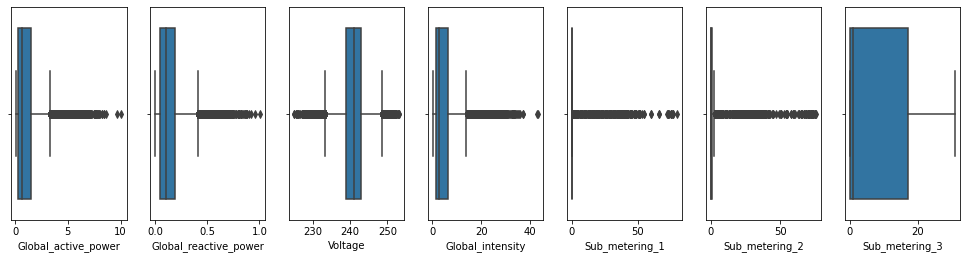

In [46]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

In [47]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [48]:
## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [49]:
replace_with_thresholds(num_df, num_df.columns)

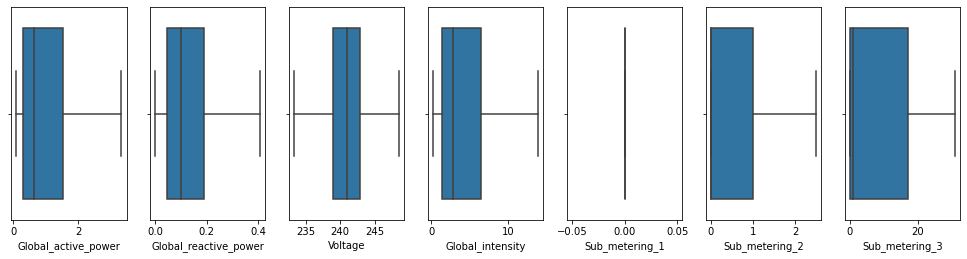

In [50]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

In [51]:
# As we can see from above boxplots outliers are removed properly

In [52]:
num_df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [53]:
for i in num_df.columns:
    dfc_newc[i]=num_df[i]

In [54]:
num_features=[col for col in dfc_new.columns if dfc_newc[col].dtype!='O']
num_df = dfc_newc[num_features]
num_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
666813,2.470,0.056,239.90,10.2,0.0,0.0,17.0
2053653,1.150,0.114,234.99,4.8,0.0,0.0,0.0
1292418,0.244,0.128,242.30,1.0,0.0,0.0,1.0
1400823,0.290,0.240,241.07,1.6,0.0,1.0,1.0
862740,0.248,0.264,243.54,1.4,0.0,0.0,0.0


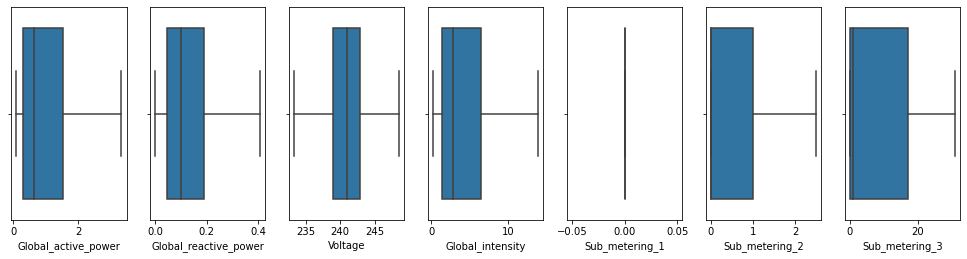

In [55]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

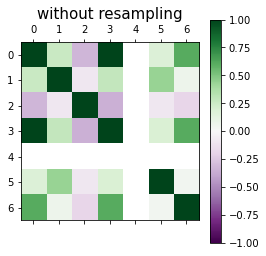

In [56]:
# Correlations among columns
plt.matshow(df_copy_mean.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()


In [57]:
df_cleaned=dfc_newc

In [58]:
df_cleaned_copy=df_cleaned

In [59]:
# Target Variable
eq1 = (df_cleaned_copy['Global_active_power']*1000/60) 
eq2 = df_cleaned_copy['Sub_metering_1'] + df_cleaned_copy['Sub_metering_2'] + df_cleaned_copy['Sub_metering_3']
df_cleaned_copy['power_consumption'] = eq1 - eq2
df_cleaned_copy.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
666813,23/3/2008,18:57:00,2.470,0.056,239.90,10.2,0.0,0.0,17.0,24.166667
2053653,11/11/2010,20:57:00,1.150,0.114,234.99,4.8,0.0,0.0,0.0,19.166667
1292418,1/6/2009,05:42:00,0.244,0.128,242.30,1.0,0.0,0.0,1.0,3.066667
1400823,15/8/2009,12:27:00,0.290,0.240,241.07,1.6,0.0,1.0,1.0,2.833333
862740,6/8/2008,20:24:00,0.248,0.264,243.54,1.4,0.0,0.0,0.0,4.133333


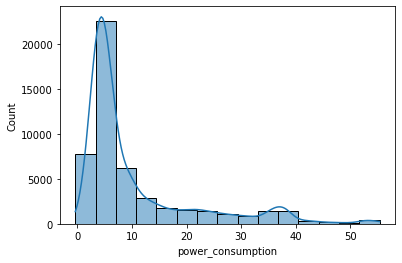

In [60]:
# Distribution of the target variables
sns.histplot(data=df_cleaned_copy, x='power_consumption', bins=15, kde=True)
plt.show()

In [61]:
dfc_newc

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
666813,23/3/2008,18:57:00,2.470,0.056,239.90,10.2,0.0,0.0,17.0,24.166667
2053653,11/11/2010,20:57:00,1.150,0.114,234.99,4.8,0.0,0.0,0.0,19.166667
1292418,1/6/2009,05:42:00,0.244,0.128,242.30,1.0,0.0,0.0,1.0,3.066667
1400823,15/8/2009,12:27:00,0.290,0.240,241.07,1.6,0.0,1.0,1.0,2.833333
862740,6/8/2008,20:24:00,0.248,0.264,243.54,1.4,0.0,0.0,0.0,4.133333
...,...,...,...,...,...,...,...,...,...,...
326362,31/7/2007,08:46:00,0.100,0.000,234.18,0.4,0.0,0.0,0.0,1.666667
1350921,11/7/2009,20:45:00,0.300,0.246,244.23,1.6,0.0,0.0,1.0,4.000000
377135,4/9/2007,14:59:00,0.402,0.102,240.76,2.0,0.0,0.0,0.0,6.700000
586705,28/1/2008,03:49:00,1.416,0.058,242.90,5.8,0.0,0.0,19.0,4.600000


In [62]:
# Defining Target variabe

In [177]:
X = df_cleaned_copy.drop(['Global_active_power'], axis=1)
y = df_cleaned_copy['Global_active_power']


In [64]:
# Split

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
df_cleaned_copy

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
666813,23/3/2008,18:57:00,2.470,0.056,239.90,10.2,0.0,0.0,17.0,24.166667
2053653,11/11/2010,20:57:00,1.150,0.114,234.99,4.8,0.0,0.0,0.0,19.166667
1292418,1/6/2009,05:42:00,0.244,0.128,242.30,1.0,0.0,0.0,1.0,3.066667
1400823,15/8/2009,12:27:00,0.290,0.240,241.07,1.6,0.0,1.0,1.0,2.833333
862740,6/8/2008,20:24:00,0.248,0.264,243.54,1.4,0.0,0.0,0.0,4.133333
...,...,...,...,...,...,...,...,...,...,...
326362,31/7/2007,08:46:00,0.100,0.000,234.18,0.4,0.0,0.0,0.0,1.666667
1350921,11/7/2009,20:45:00,0.300,0.246,244.23,1.6,0.0,0.0,1.0,4.000000
377135,4/9/2007,14:59:00,0.402,0.102,240.76,2.0,0.0,0.0,0.0,6.700000
586705,28/1/2008,03:49:00,1.416,0.058,242.90,5.8,0.0,0.0,19.0,4.600000


In [67]:
df_cleaned_copy['Day_scrapped']=pd.to_datetime(df_cleaned_copy['Date']).dt.day

In [68]:
df_cleaned_copy

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,Day_scrapped
666813,23/3/2008,18:57:00,2.470,0.056,239.90,10.2,0.0,0.0,17.0,24.166667,23
2053653,11/11/2010,20:57:00,1.150,0.114,234.99,4.8,0.0,0.0,0.0,19.166667,11
1292418,1/6/2009,05:42:00,0.244,0.128,242.30,1.0,0.0,0.0,1.0,3.066667,6
1400823,15/8/2009,12:27:00,0.290,0.240,241.07,1.6,0.0,1.0,1.0,2.833333,15
862740,6/8/2008,20:24:00,0.248,0.264,243.54,1.4,0.0,0.0,0.0,4.133333,8
...,...,...,...,...,...,...,...,...,...,...,...
326362,31/7/2007,08:46:00,0.100,0.000,234.18,0.4,0.0,0.0,0.0,1.666667,31
1350921,11/7/2009,20:45:00,0.300,0.246,244.23,1.6,0.0,0.0,1.0,4.000000,7
377135,4/9/2007,14:59:00,0.402,0.102,240.76,2.0,0.0,0.0,0.0,6.700000,9
586705,28/1/2008,03:49:00,1.416,0.058,242.90,5.8,0.0,0.0,19.0,4.600000,28


In [69]:
df_cleaned_copy['Month_scrapped']=pd.to_datetime(df_cleaned_copy['Date']).dt.month

In [70]:
df_cleaned_copy['Year_scrapped']=pd.to_datetime(df_cleaned_copy['Date']).dt.year

In [71]:
df_cleaned_copy['Hour_of_day']=pd.to_datetime(df_cleaned_copy['Time']).dt.hour

In [72]:
df_cleaned_copy

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,Day_scrapped,Month_scrapped,Year_scrapped,Hour_of_day
666813,23/3/2008,18:57:00,2.470,0.056,239.90,10.2,0.0,0.0,17.0,24.166667,23,3,2008,18
2053653,11/11/2010,20:57:00,1.150,0.114,234.99,4.8,0.0,0.0,0.0,19.166667,11,11,2010,20
1292418,1/6/2009,05:42:00,0.244,0.128,242.30,1.0,0.0,0.0,1.0,3.066667,6,1,2009,5
1400823,15/8/2009,12:27:00,0.290,0.240,241.07,1.6,0.0,1.0,1.0,2.833333,15,8,2009,12
862740,6/8/2008,20:24:00,0.248,0.264,243.54,1.4,0.0,0.0,0.0,4.133333,8,6,2008,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326362,31/7/2007,08:46:00,0.100,0.000,234.18,0.4,0.0,0.0,0.0,1.666667,31,7,2007,8
1350921,11/7/2009,20:45:00,0.300,0.246,244.23,1.6,0.0,0.0,1.0,4.000000,7,11,2009,20
377135,4/9/2007,14:59:00,0.402,0.102,240.76,2.0,0.0,0.0,0.0,6.700000,9,4,2007,14
586705,28/1/2008,03:49:00,1.416,0.058,242.90,5.8,0.0,0.0,19.0,4.600000,28,1,2008,3


In [73]:
df_cleaned_copy=df_cleaned_copy.drop(['Date','Time'],axis=1)

In [74]:
df_cleaned_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 666813 to 1350489
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    50000 non-null  float64
 1   Global_reactive_power  50000 non-null  float64
 2   Voltage                50000 non-null  float64
 3   Global_intensity       50000 non-null  float64
 4   Sub_metering_1         50000 non-null  float64
 5   Sub_metering_2         50000 non-null  float64
 6   Sub_metering_3         50000 non-null  float64
 7   power_consumption      50000 non-null  float64
 8   Day_scrapped           50000 non-null  int64  
 9   Month_scrapped         50000 non-null  int64  
 10  Year_scrapped          50000 non-null  int64  
 11  Hour_of_day            50000 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 6.0 MB


In [75]:
# Now dfc_cleaned_copy is ready for EDA analysis

In [76]:
# space for EDA Analysis

In [77]:
# Defining Target variabe

X = df_cleaned_copy.drop(['Global_active_power'], axis=1)
y = df_cleaned_copy['Global_active_power']



In [78]:
X

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,Day_scrapped,Month_scrapped,Year_scrapped,Hour_of_day
666813,0.056,239.90,10.2,0.0,0.0,17.0,24.166667,23,3,2008,18
2053653,0.114,234.99,4.8,0.0,0.0,0.0,19.166667,11,11,2010,20
1292418,0.128,242.30,1.0,0.0,0.0,1.0,3.066667,6,1,2009,5
1400823,0.240,241.07,1.6,0.0,1.0,1.0,2.833333,15,8,2009,12
862740,0.264,243.54,1.4,0.0,0.0,0.0,4.133333,8,6,2008,20
...,...,...,...,...,...,...,...,...,...,...,...
326362,0.000,234.18,0.4,0.0,0.0,0.0,1.666667,31,7,2007,8
1350921,0.246,244.23,1.6,0.0,0.0,1.0,4.000000,7,11,2009,20
377135,0.102,240.76,2.0,0.0,0.0,0.0,6.700000,9,4,2007,14
586705,0.058,242.90,5.8,0.0,0.0,19.0,4.600000,28,1,2008,3


In [79]:
# Standarization or feature scaling the datasets

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
X_train_scaled=scaler.fit_transform(X_train)

In [82]:
X_test_scaled=scaler.transform(X_test)

In [83]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [84]:
preprocess_model = [X_train,y_train,X_test,y_test]

In [85]:
import pickle

pickle.dump(preprocess_model, open('preprocess_model.pkl','wb'))


In [86]:
df_mongo=pd.DataFrame(X)
df_mongo['Global_active_power']=pd.DataFrame(y)

In [87]:
df_mongo

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,Day_scrapped,Month_scrapped,Year_scrapped,Hour_of_day,Global_active_power
666813,0.056,239.90,10.2,0.0,0.0,17.0,24.166667,23,3,2008,18,2.470
2053653,0.114,234.99,4.8,0.0,0.0,0.0,19.166667,11,11,2010,20,1.150
1292418,0.128,242.30,1.0,0.0,0.0,1.0,3.066667,6,1,2009,5,0.244
1400823,0.240,241.07,1.6,0.0,1.0,1.0,2.833333,15,8,2009,12,0.290
862740,0.264,243.54,1.4,0.0,0.0,0.0,4.133333,8,6,2008,20,0.248
...,...,...,...,...,...,...,...,...,...,...,...,...
326362,0.000,234.18,0.4,0.0,0.0,0.0,1.666667,31,7,2007,8,0.100
1350921,0.246,244.23,1.6,0.0,0.0,1.0,4.000000,7,11,2009,20,0.300
377135,0.102,240.76,2.0,0.0,0.0,0.0,6.700000,9,4,2007,14,0.402
586705,0.058,242.90,5.8,0.0,0.0,19.0,4.600000,28,1,2008,3,1.416


In [88]:
p=[]
for i,row in df_mongo.iterrows():
    p.append(dict(row))
    



In [89]:
p

[{'Global_reactive_power': 0.056,
  'Voltage': 239.9,
  'Global_intensity': 10.2,
  'Sub_metering_1': 0.0,
  'Sub_metering_2': 0.0,
  'Sub_metering_3': 17.0,
  'power_consumption': 24.166666666666664,
  'Day_scrapped': 23.0,
  'Month_scrapped': 3.0,
  'Year_scrapped': 2008.0,
  'Hour_of_day': 18.0,
  'Global_active_power': 2.47},
 {'Global_reactive_power': 0.114,
  'Voltage': 234.99,
  'Global_intensity': 4.8,
  'Sub_metering_1': 0.0,
  'Sub_metering_2': 0.0,
  'Sub_metering_3': 0.0,
  'power_consumption': 19.166666666666668,
  'Day_scrapped': 11.0,
  'Month_scrapped': 11.0,
  'Year_scrapped': 2010.0,
  'Hour_of_day': 20.0,
  'Global_active_power': 1.15},
 {'Global_reactive_power': 0.128,
  'Voltage': 242.3,
  'Global_intensity': 1.0,
  'Sub_metering_1': 0.0,
  'Sub_metering_2': 0.0,
  'Sub_metering_3': 1.0,
  'power_consumption': 3.0666666666666664,
  'Day_scrapped': 6.0,
  'Month_scrapped': 1.0,
  'Year_scrapped': 2009.0,
  'Hour_of_day': 5.0,
  'Global_active_power': 0.244},
 {'Glob

In [90]:
df_mongo.iterrows()

<generator object DataFrame.iterrows at 0x000001158D475200>

In [91]:
import pymongo


client = pymongo.MongoClient("mongodb+srv://Tandon78:******tandon.el8wcqy.mongodb.net/?retryWrites=true&w=majority")
db = client.test
db1 = client['RegressionModel']
coll = db1["Data"]

ValueError: Port must be an integer between 0 and 65535: '******tandon.el8wcqy.mongodb.net'

In [ ]:
coll.insert_many(p)

In [92]:
pickle_prepro_df=pickle.load(open('preprocess_model.pkl','rb'))


In [93]:
pickle_prepro_df[2]

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,Day_scrapped,Month_scrapped,Year_scrapped,Hour_of_day
1674566,0.144,239.46,13.9,0.0,1.0,18.0,36.416667,21,2,2010,14
208087,0.102,236.67,1.0,0.0,0.0,0.0,3.633333,5,10,2007,5
734284,0.052,240.91,6.4,0.0,0.0,19.0,6.600000,5,9,2008,15
1776682,0.072,237.94,1.2,0.0,1.0,1.0,3.166667,5,3,2010,12
700614,0.060,242.24,5.8,0.0,0.0,19.0,4.766667,16,4,2008,6
...,...,...,...,...,...,...,...,...,...,...,...
1168385,0.000,245.92,1.2,0.0,0.0,0.0,4.500000,3,7,2009,2
598624,0.062,240.18,6.2,0.0,0.0,17.0,7.966667,2,5,2008,10
636075,0.048,237.65,6.4,0.0,0.0,17.0,8.866667,3,2,2008,10
1469624,0.100,239.23,12.4,0.0,0.0,18.0,31.466667,10,2,2009,7


In [94]:
X_train=pickle_prepro_df[0]
y_train=pickle_prepro_df[1]
X_test=pickle_prepro_df[2]
y_test=pickle_prepro_df[3]

In [95]:

# Now Model Training

In [96]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()



In [97]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [98]:
lin_reg_pred=lin_reg.predict(X_test)

In [99]:
lin_reg_pred

array([3.325, 0.218, 1.536, ..., 1.552, 2.968, 0.178])

Text(0, 0.5, 'test_predicted_data')

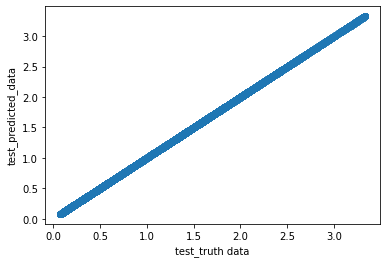

In [100]:
plt.scatter(y_test,lin_reg_pred)
plt.xlabel("test_truth data")
plt.ylabel("test_predicted_data")

In [101]:
# Residuals( Basically errors)
residuals=y_test-lin_reg_pred

In [102]:
residuals

1674566   -4.884981e-15
208087     2.386980e-15
734284    -1.998401e-15
1776682    1.942890e-15
700614    -1.776357e-15
               ...     
1168385    2.775558e-16
598624    -1.332268e-15
636075    -1.332268e-15
1469624   -4.884981e-15
1827043    9.159340e-16
Name: Global_active_power, Length: 16500, dtype: float64

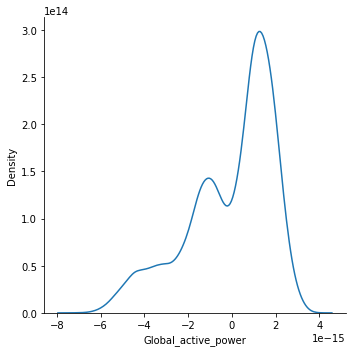

In [103]:
sns.displot(residuals,kind="kde")

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [105]:
print(mean_squared_error(y_test,lin_reg_pred))

print(mean_absolute_error(y_test,lin_reg_pred))



3.9356297291049445e-30
1.629355741237439e-15


In [106]:
np.sqrt(mean_squared_error(y_test,lin_reg_pred))

1.9838421633549745e-15

In [107]:
# Now Performance Matrices

In [108]:
from sklearn.metrics import r2_score

In [109]:
score=r2_score(y_test,lin_reg_pred)

In [110]:
score

1.0

In [111]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

1.0

In [112]:
# R2 and adjusted R2

In [113]:
from sklearn.metrics import r2_score

In [114]:
r2=r2_score(y_test,lin_reg_pred)
r2

1.0

In [115]:
adj_r2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [116]:
adj_r2

1.0

In [117]:
lin_reg_pred

array([3.325, 0.218, 1.536, ..., 1.552, 2.968, 0.178])

In [118]:
y_test

1674566    3.325
208087     0.218
734284     1.536
1776682    0.310
700614     1.426
           ...  
1168385    0.270
598624     1.498
636075     1.552
1469624    2.968
1827043    0.178
Name: Global_active_power, Length: 16500, dtype: float64

In [119]:
# Ridge

In [120]:
from sklearn.linear_model import Ridge
rid_reg=Ridge()


     



In [121]:
rid_reg.fit(X_train,y_train)     

Ridge()

In [122]:
rid_reg_pred=rid_reg.predict(X_test)

In [123]:
rid_reg_pred

array([3.32500014, 0.2179975 , 1.53600482, ..., 1.55199779, 2.96800427,
       0.17800538])

In [124]:
# Residuals( Basically errors)
residuals=y_test-rid_reg_pred



In [125]:
residuals



1674566   -1.437105e-07
208087     2.499471e-06
734284    -4.815499e-06
1776682    1.396889e-05
700614     2.822988e-06
               ...     
1168385   -7.033041e-06
598624    -7.222848e-07
636075     2.210724e-06
1469624   -4.269540e-06
1827043   -5.375967e-06
Name: Global_active_power, Length: 16500, dtype: float64

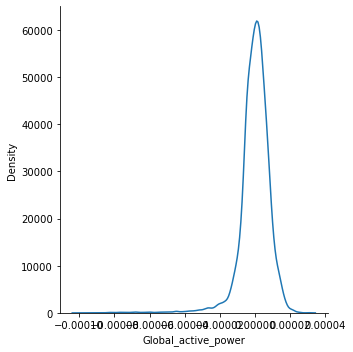

In [126]:
sns.displot(residuals,kind="kde")



In [127]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print(mean_squared_error(y_test,rid_reg_pred))

print(mean_absolute_error(y_test,rid_reg_pred))





7.729853168908764e-11
5.790170668182663e-06


In [128]:
np.sqrt(mean_squared_error(y_test,rid_reg_pred))



8.791958353466402e-06

In [129]:
# Now Performance Matrices



In [130]:
# R2 and adjusted R2

from sklearn.metrics import r2_score

r2=r2_score(y_test,rid_reg_pred)
r2



0.9999999999064797

In [131]:
adj_r2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

adj_r2

0.9999999999064173

In [132]:
# Lasso

In [133]:
from sklearn.linear_model import Lasso
las_reg=Lasso()

In [134]:
las_reg.fit(X_train,y_train)     

Lasso()

In [135]:
las_reg_pred=las_reg.predict(X_test)

In [136]:
las_reg_pred

array([2.9936059 , 0.36375501, 1.42548961, ..., 1.45346149, 2.72540328,
       0.32087181])

In [137]:
# Residuals( Basically errors)
residuals=y_test-las_reg_pred



In [138]:
residuals



1674566    0.331394
208087    -0.145755
734284     0.110510
1776682   -0.075891
700614     0.099845
             ...   
1168385   -0.140713
598624     0.093303
636075     0.098539
1469624    0.242597
1827043   -0.142872
Name: Global_active_power, Length: 16500, dtype: float64

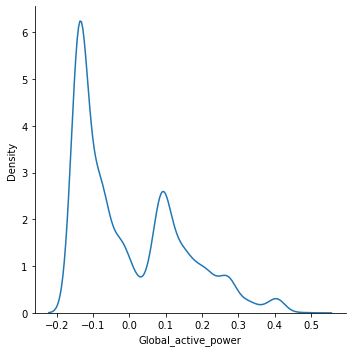

In [139]:
sns.displot(residuals,kind="kde")



In [140]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print(mean_squared_error(y_test,las_reg_pred))

print(mean_absolute_error(y_test,las_reg_pred))





0.02124542746135109
0.126131580547098


In [141]:
np.sqrt(mean_squared_error(y_test,las_reg_pred))



0.145758112849169

In [142]:
# Now Performance Matrices



In [143]:
# R2 and adjusted R2

from sklearn.metrics import r2_score

r2=r2_score(y_test,las_reg_pred)
r2



0.9742960314488348

In [144]:
adj_r2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

adj_r2

0.9742788829982002

In [145]:
# ElasticNet

In [146]:
from sklearn.linear_model import ElasticNet
elas_reg=ElasticNet()


In [147]:
elas_reg.fit(X_train,y_train)     

ElasticNet()

In [148]:
elas_reg_pred=elas_reg.predict(X_test)

In [149]:
elas_reg_pred

array([3.1429172 , 0.30438261, 1.48893368, ..., 1.51192197, 2.8594661 ,
       0.26234828])

In [150]:
# Residuals( Basically errors)
residuals=y_test-elas_reg_pred



In [151]:
residuals



1674566    0.182083
208087    -0.086383
734284     0.047066
1776682   -0.021064
700614     0.042048
             ...   
1168385   -0.084010
598624     0.037615
636075     0.040078
1469624    0.108534
1827043   -0.084348
Name: Global_active_power, Length: 16500, dtype: float64

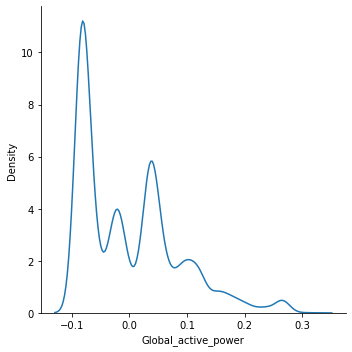

In [152]:
sns.displot(residuals,kind="kde")



In [153]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print(mean_squared_error(y_test,elas_reg_pred))

print(mean_absolute_error(y_test,elas_reg_pred))





0.007243049969245225
0.07129344591828123


In [154]:
np.sqrt(mean_squared_error(y_test,elas_reg_pred))



0.0851061100582398

In [155]:
# Now Performance Matrices



In [156]:
# R2 and adjusted R2

from sklearn.metrics import r2_score

r2=r2_score(y_test,elas_reg_pred)
r2



0.9912369318545047

In [157]:
adj_r2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

adj_r2

0.9912310855572217

In [158]:
from sklearn.svm import SVR
svr=SVR()

In [159]:
svr.fit(X_train,y_train)

SVR()

In [160]:
svr_pred=svr.predict(X_test)

In [161]:
from sklearn.metrics import r2_score

In [162]:
r2=r2_score(y_test,svr_pred)
r2

0.9894209017249768

In [163]:
adj_r2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

adj_r2

0.9894138438598006

In [234]:
# Hyperparameter Tuning

In [237]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV

In [241]:
#defining the parameter range
param_grid={'C': [0.1,10],
           'gamma': [1,0.1],
           'kernel': ['rbf']}

grid=GridSearchCV(SVR(),param_grid, refit=True, verbose= 3)


In [242]:
#fitting the model for grid search
grid_search=grid.fit(X_train,y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.165 total time= 1.4min
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.171 total time= 1.5min
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.147 total time= 1.1min
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.159 total time= 1.1min
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.157 total time= 1.1min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.744 total time= 1.0min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.735 total time= 1.1min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time= 1.1min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.734 total time= 1.0min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.730 total time= 1.2min
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.189 total time= 5.1min
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;,

In [243]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [244]:
grid_search.best_score_

0.9423312804183637

In [245]:
# ThankYou!

In [164]:
# Bagging regressor

In [178]:
>>> from sklearn.svm import SVR
>>> from sklearn.ensemble import BaggingRegressor
>>> from sklearn.datasets import make_regression


In [186]:
regr = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0,oob_score=True)


In [187]:
regr.fit(X_train,y_train)

BaggingRegressor(base_estimator=SVR(), oob_score=True, random_state=0)

In [189]:
regr.predict(X_test)


array([3.13958601, 0.32846864, 1.47305857, ..., 1.50085192, 2.84199984,
       0.27731942])

In [190]:
regr.oob_score_

0.9683552303018913

782345     0.268
1022872    0.212
1015073    0.420
1253001    2.292
1560841    1.688
           ...  
1959346    1.364
2067631    0.322
204707     0.288
80202      2.910
624943     2.668
Name: Global_active_power, Length: 33500, dtype: float64

In [192]:
>>> from sklearn.model_selection import train_test_split
>>> from sklearn.ensemble import ExtraTreesRegressor



In [193]:
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)


In [194]:
reg.score(X_test, y_test)

0.9996331607235576

In [195]:
>>> from sklearn.ensemble import RandomForestRegressor
>>> from sklearn.ensemble import VotingRegressor

In [196]:
>>> r1 = LinearRegression()
>>> r2 = RandomForestRegressor(n_estimators=10, random_state=1)
>>> r3 = SVR()
>>> er = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])


In [198]:
ee=er.fit(X_train, y_train)

In [205]:
y_pred_VC=ee.predict(X_test)

In [211]:
ee.score(X_test,y_test)

0.9986808161943899

In [208]:
y_pred_VC

array([3.26317767, 0.25487696, 1.51384657, ..., 1.53051501, 2.93016793,
       0.21119717])

In [212]:
# Random Forest Regressor

In [213]:
>>> from sklearn.ensemble import RandomForestRegressor
>>> from sklearn.datasets import make_regression
>>> regr = RandomForestRegressor(max_depth=2, random_state=0)


In [214]:
regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=0)

In [215]:
regr.score(X_test,y_test)

0.9451094967235945

In [217]:
y_predRF=regr.predict(X_test)

In [221]:
y_predRF

array([2.93224649, 0.3097247 , 1.56592678, ..., 1.56592678, 2.93224649,
       0.3097247 ])